<a href="https://colab.research.google.com/github/22f22650/E-Learning-Application/blob/main/Cheetah_Hyena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:

train_dir = '/content/drive/MyDrive/Cheetah  Hyena /train'
test_dir = '/content/drive/MyDrive/Cheetah  Hyena /test'

In [9]:
import os
print(len(os.listdir('/content/drive/MyDrive/Cheetah  Hyena /train/cheetah')))
print(len(os.listdir('/content/drive/MyDrive/Cheetah  Hyena /train/hyena')))
print(len(os.listdir('/content/drive/MyDrive/Cheetah  Hyena /test/cheetah')))
print(len(os.listdir('/content/drive/MyDrive/Cheetah  Hyena /test/hyena')))

900
900
100
100


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 1440 images belonging to 2 classes.
Found 360 images belonging to 2 classes.


In [11]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [12]:
# create CNN model - custom-made

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [14]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 391s 8s/step - accuracy: 0.5361 - loss: 1.0098 - val_accuracy: 0.7917 - val_loss: 0.5440
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 239s 5s/step - accuracy: 0.7774 - loss: 0.4945 - val_accuracy: 0.8194 - val_loss: 0.3827
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 246s 5s/step - accuracy: 0.8682 - loss: 0.3262 - val_accuracy: 0.8639 - val_loss: 0.3282
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 241s 5s/step - accuracy: 0.9035 - loss: 0.2241 - val_accuracy: 0.8889 - val_loss: 0.2570
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 241s 5s/step - accuracy: 0.9265 - loss: 0.1754 - val_accuracy: 0.8944 - val_loss: 0.2611
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 250s 6s/step - accuracy: 0.9515 - loss: 0.1318 - val_accuracy: 0.9000 - val_loss: 0.2545
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 241s 5s/step - accuracy: 0.9640 - loss: 0.1025 - val_accuracy: 0.9028 - val_loss: 0.3833
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 243s 5s/step - accuracy: 0.9900 - loss: 0.0468 - val_accuracy: 0.8556 - v

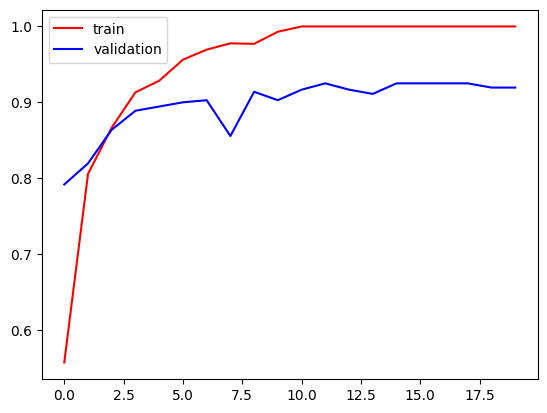

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

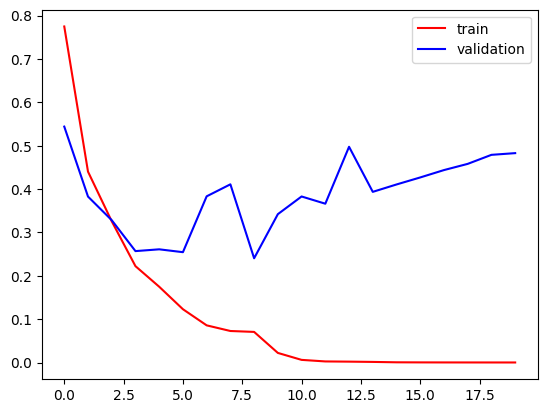

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.


In [19]:
predictions = model.predict(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 34s 5s/step


In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[48 52]
 [51 49]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.48      0.48       100
           1       0.49      0.49      0.49       100

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200



In [21]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 400s 9s/step - accuracy: 0.6667 - loss: 6.2447 - val_accuracy: 0.5361 - val_loss: 5.6272
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 376s 8s/step - accuracy: 0.7606 - loss: 2.4207 - val_accuracy: 0.5139 - val_loss: 4.8283
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 375s 8s/step - accuracy: 0.8155 - loss: 1.3346 - val_accuracy: 0.5000 - val_loss: 33.7105
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 394s 9s/step - accuracy: 0.8457 - loss: 1.6582 - val_accuracy: 0.5000 - val_loss: 15.2404
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 378s 8s/step - accuracy: 0.8961 - loss: 0.5999 - val_accuracy: 0.5250 - val_loss: 6.2827
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 375s 8s/step - accuracy: 0.8961 - loss: 0.6930 - val_accuracy: 0.5028 - val_loss: 12.4955
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 376s 8s/step - accuracy: 0.9128 - loss: 0.6373 - val_accuracy: 0.5806 - val_loss: 6.6357
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 390s 9s/step - accuracy: 0.9303 - loss: 0.3941 - val_accuracy: 0.6889 

In [26]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.


In [27]:
predictions = model.predict(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step


In [28]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[51 49]
 [55 45]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.48      0.51      0.50       100
           1       0.48      0.45      0.46       100

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200



In [29]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [30]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 475s 10s/step - accuracy: 0.5095 - loss: 3.0378 - val_accuracy: 0.6889 - val_loss: 0.6280
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 489s 10s/step - accuracy: 0.7074 - loss: 0.5717 - val_accuracy: 0.6944 - val_loss: 0.5442
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 504s 11s/step - accuracy: 0.7272 - loss: 0.5170 - val_accuracy: 0.5750 - val_loss: 0.7924
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 455s 10s/step - accuracy: 0.6708 - loss: 0.6100 - val_accuracy: 0.8028 - val_loss: 0.4524
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 458s 10s/step - accuracy: 0.7846 - loss: 0.4433 - val_accuracy: 0.7333 - val_loss: 0.4939
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 511s 11s/step - accuracy: 0.7537 - loss: 0.5219 - val_accuracy: 0.7694 - val_loss: 0.4562
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 507s 10s/step - accuracy: 0.8082 - loss: 0.4233 - val_accuracy: 0.7583 - val_loss: 0.5306
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 450s 10s/step - accuracy: 0.8277 - loss: 0.3990 - val_accuracy: 0.

In [32]:
predictions = resnet_model.predict(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 59s 8s/step


In [33]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[48 52]
 [56 44]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.46      0.48      0.47       100
           1       0.46      0.44      0.45       100

    accuracy                           0.46       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.46      0.46      0.46       200

